In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras


2023-10-17 12:47:29.276187: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 12:47:29.321651: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 12:47:29.321701: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 12:47:29.321740: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 12:47:29.330236: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 12:47:29.330792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#to see length of training dataset
len(x_train)

60000

In [5]:
##to see length of testing dataset
len(x_test)


10000

In [6]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [7]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape


(10000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

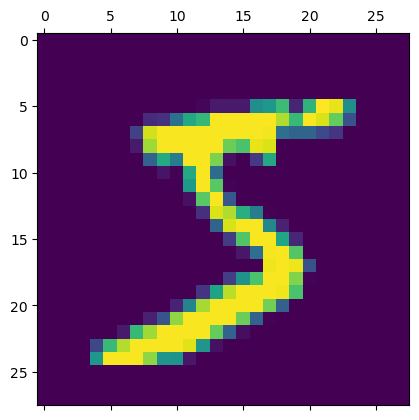

In [9]:
#to see how first image look
plt.matshow(x_train[0])

In [10]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [11]:


x_train[0]



array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#Define the network architecture using Keras

In [13]:


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

2023-10-17 12:51:33.002641: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1853/1875 [============================>.] - ETA: 0s - loss: 0.6494 - accuracy: 0.8338

2023-10-17 12:51:40.726752: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.6465 - accuracy: 0.8344 - val_loss: 0.3630 - val_accuracy: 0.8981
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3396 - accuracy: 0.9036 - val_loss: 0.2967 - val_accuracy: 0.9176
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2908 - accuracy: 0.9175 - val_loss: 0.2653 - val_accuracy: 0.9254
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2599 - accuracy: 0.9268 - val_loss: 0.2413 - val_accuracy: 0.9338
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2366 - accuracy: 0.9340 - val_loss: 0.2238 - val_accuracy: 0.9363
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2177 - accuracy: 0.9388 - val_loss: 0.2063 - val_accuracy: 0.9421
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2020 - accuracy: 0.9435 - val_loss: 0.1933 - val_accuracy: 0.9447
Epo

In [17]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

 70/313 [=====>........................] - ETA: 0s - loss: 0.2279 - accuracy: 0.9330

2023-10-17 12:52:45.759132: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9533
Loss=0.163
Accuracy=0.953


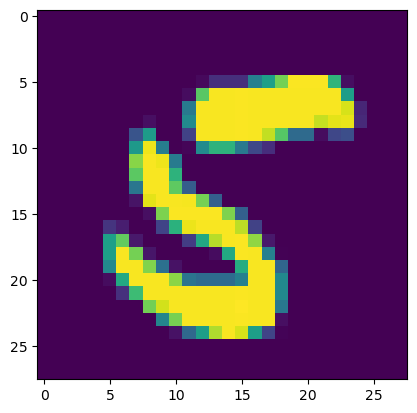

In [18]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [19]:


#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))



 38/313 [==>...........................] - ETA: 0s 

2023-10-17 12:53:31.975346: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step
Handwritten number in the image is= 5


In [20]:


history.history??



In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

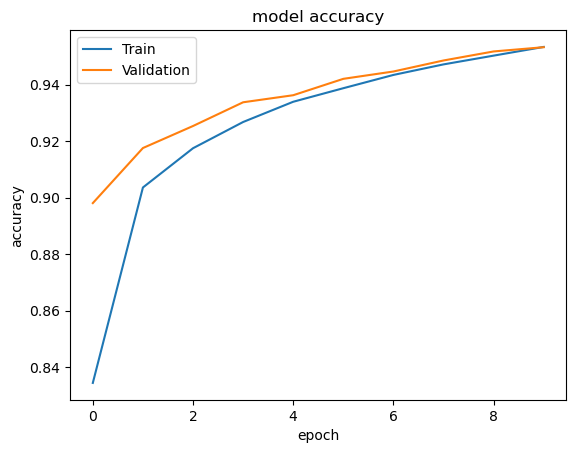

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

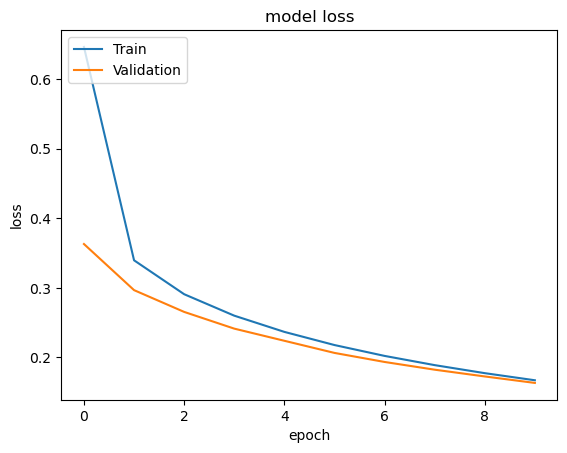

In [23]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



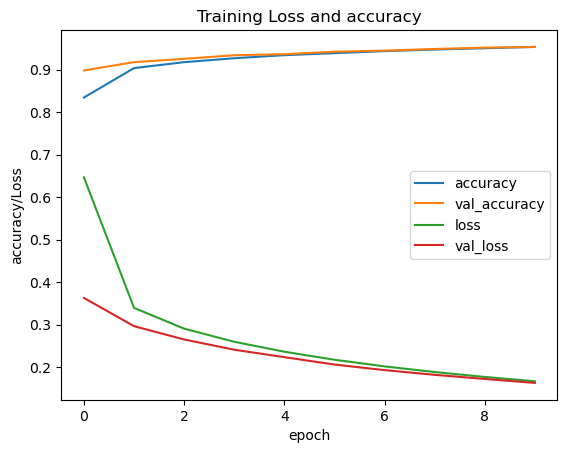

In [24]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()



In [25]:


#pwd



In [26]:
keras_model_path='C:\\Users\\admin'
model.save(keras_model_path)


INFO:tensorflow:Assets written to: C:\Users\admin/assets


INFO:tensorflow:Assets written to: C:\Users\admin/assets


In [27]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for C:\Users\admin/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.